In [ ]:
#1.일반적인 텍스트로 품사 구분을 하고 텍스트에서 빈도가 높은 데이터로 그래프와 워드 클라우드를 그려라.

In [12]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [27]:
with open('/Users/oseulgi/Desktop/lease.txt', 'r', encoding='utf-8') as f:
    text = f.read().replace('\n', '')
    print(text)
    
    ##저는 소설가 김동인씨의 '벗기운 대금업자'를 선택하여 진행하였습니다. 

"여보, 주인."하는 소리에 전당국 주인 삼덕이는 젓가락을 놓고 이편 방으로 나왔습니다. 거기는 험상스럽게 생긴 노동자 한 명이, 무슨 커다란 보퉁이를 하나 끼고 서 있었습니다."이것 맡고, 1원만 주우.""그게 뭐요?""내 양복이오. 아직 멀쩡한 새 양복이오."삼덕이는 보를 받아서 풀어보았습니다. 양복? 사실, 양복이라고 밖에는 명명할 수 없는 물건이었습니다. 걸레라 하기에는, 너무 무거웠습니다. 옷감이라기에는 벌써 가공을 한 물건이었습니다. 그것은, 낡은 스카치 양복인데, 본시는 검은빛이었던 것 같으나 벌써 흰빛에 가깝게 되었으며, 전체가 속실이 보이며 팔굽과 무릎은 커다란 구멍이 뚫린, 걸레에 가까운 양복이었습니다. 그리고 아무리 높이 보아도, 20전짜리 이상은 못 될 것이었습니다. 그러나 의리상 삼덕이는 그것을 뒤적여서 안을 보았습니다. 안은 벌써 다 찢어져 없어졌으며, 주머니만 세 개가 늘어져 있었습니다. 이것을 어이없이 잠깐 들여다본 삼덕이는, 그 양복을 다시 싸면서 머리를 흔들었습니다."저, 다른 집으로 가지고 가보시지요.""뭐요?""다른……."말을 시작하다가 삼덕이는 중도에 끊어버렸습니다. 그 손님의 험상궂은 눈이 갑자기 더 빛나기 시작한 때문이었습니다. 손님은 툇마루에 쿵 소리를 내며 걸터앉았습니다."여보, 그래 이 집은 전당국이 아니란 말이오?""네, 저, 전당국은 전당국이외다만…….""그럼, 내 양복이 1원짜리가 못 된단 말이오?""못 될 리가 있습니까.""그럼, 왜 말이 많아. 아, 그래…….""가, 가, 가만계세요. 누가 안 드리겠답니까. 혹은 다른 집에 가면 더 낼 집이 있을까 하고 그랬지요. 드리다 뿐이겠습니까. 기다리십쇼, 곧 내다드릴게."삼덕이는 그 자리를 피하여 이편으로 와서 손철궤를 열어보았습니다. 그 속에는 단 23전!"네, 곧 드리지요."그는 손님에게 다시 한번 허리를 굽혀보고 안방으로 들어왔습니다."여보, 마누라. 돈 80전만 없소?""돈이 웬 돈? 무엇에 쓸려우?""누가 양복을 잡히러 왔는데, 20전밖에 없구려. 있으면

In [38]:
k_stop = [('이', 'VCP'), ('나오', 'VV'), ('있', 'VA'), ('가지', 'VV'), ('하', 'VV'), ('씨', 'NNB'), ('것', 'NNB'), ('시키', 'XSV'),
          ('들', 'XSN'), ('만들', 'VV'), ('그', 'MM'), ('지금', 'NNG'), ('되', 'VV'), ('생각하', 'VV'), ('수', 'NNB'), ('그러', 'VV'),
          ('이', 'NP'), ('속', 'NNG'), ('보', 'VX'), ('하나', 'NR'), ('않', 'VX'), ('집', 'NNG'), ('없', 'VA'), ('살', 'VV'), 
          ('나', 'NP'), ('모르', 'VV'), ('사람', 'NNG'), ('적', 'XSN'), ('주', 'VV'), ('월', 'NNB'), ('아니', 'VCN' ), ('데', 'NNB'), 
          ('등', 'NNB'), ('자신', 'NNG'), ('같', 'VA'), ('안', 'MAG'), ('우리', 'NP'), ('어떤', 'MM'), ('때', 'NNG'), ('내', 'NP'), 
          ('년', 'NNB'), ('내', 'VV'), ('가', 'VV'), ('경우', 'NNG'), ('한', 'MM'), ('명', 'NNB'), ('지', 'VX'), ('생각', 'NNG'), 
          ('대하', 'VV'), ('시간', 'NNG'), ('오', 'VV'), ('그녀', 'NP'), ('말', 'NNG'), ('다시', 'MAG'), ('일', 'NNG'), ('이런', 'MM'), 
          ('그렇', 'VA'), ('앞', 'NNG'), ('위하', 'VV'), ('보이', 'VV'), ('때문', 'NNB'), ('번', 'NNB'), ('그것', 'NP'), ('나', 'VX'), 
          ('두', 'VV'), ('다른', 'MM'), ('말하', 'VV'), ('어떻', 'VA'), ('알', 'VV'), ('여자', 'NNG'), ('그러나', 'MAJ'), 
          ('개', 'NNB'), ('받', 'VV'), ('전', 'NNG'), ('못하', 'VX'), ('들', 'VV'), ('일', 'NNB'), ('사실', 'NNG'), ('그런', 'MM'),
          ('이렇', 'VA'), ('또', 'MAG'), ('점', 'NNG'), ('문제', 'NNG'), ('싶', 'VX'), ('더', 'MAG'), ('말', 'VX'), ('사회', 'NNG'), 
          ('정도', 'NNG'), ('많', 'VA'), ('좀', 'MAG'), ('그리고', 'MAJ'), ('원', 'NNB'), ('좋', 'VA'), ('잘', 'MAG'), ('크', 'VA'), 
          ('통하', 'VV'), ('따르', 'VV'), ('소리', 'NNG'), ('중', 'NNB'), ('놓', 'VX'),('전', 'NNG')]

In [39]:
k_stops = {}

for k, g in k_stop:
    k_stops[k] = g

In [41]:
from matplotlib import font_manager

font_dirs = ["/Users/oseulgi/Downloads/Nanum_Gothic/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

font_name = "NanumGothic"


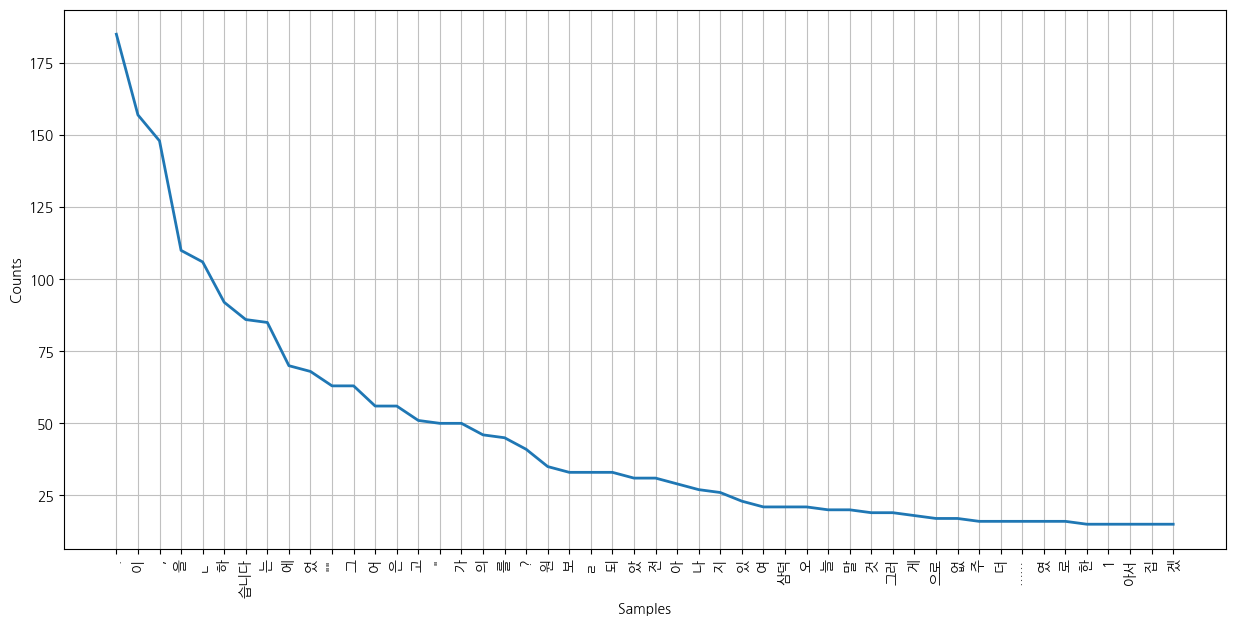

<Axes: xlabel='Samples', ylabel='Counts'>

In [42]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 그래프에 한글 폰트 설정
font_name = matplotlib.font_manager.FontProperties(fname="/Users/oseulgi/Downloads/Nanum_Gothic/NanumGothic-Bold.ttf").get_name()
 # NanumGothic.otf
matplotlib.rc('font', family=font_name)

word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15,7))
word_counted.plot(50)

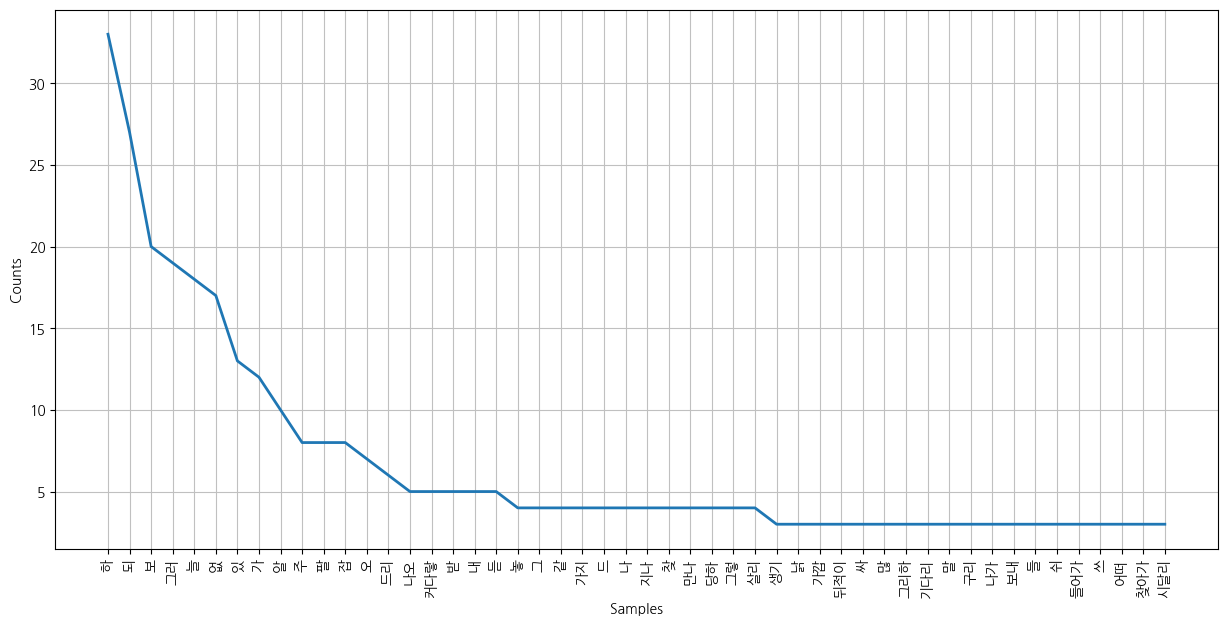

<Axes: xlabel='Samples', ylabel='Counts'>

In [43]:

# 그래프에 한글 폰트 설정
font_name = matplotlib.font_manager.FontProperties(fname="/Users/oseulgi/Downloads/Nanum_Gothic/NanumGothic-Bold.ttf").get_name()
 # NanumGothic.otf
    

word_counted = nltk.Text(word_cleaned3)
plt.figure(figsize=(15,7))
word_counted.plot(50)

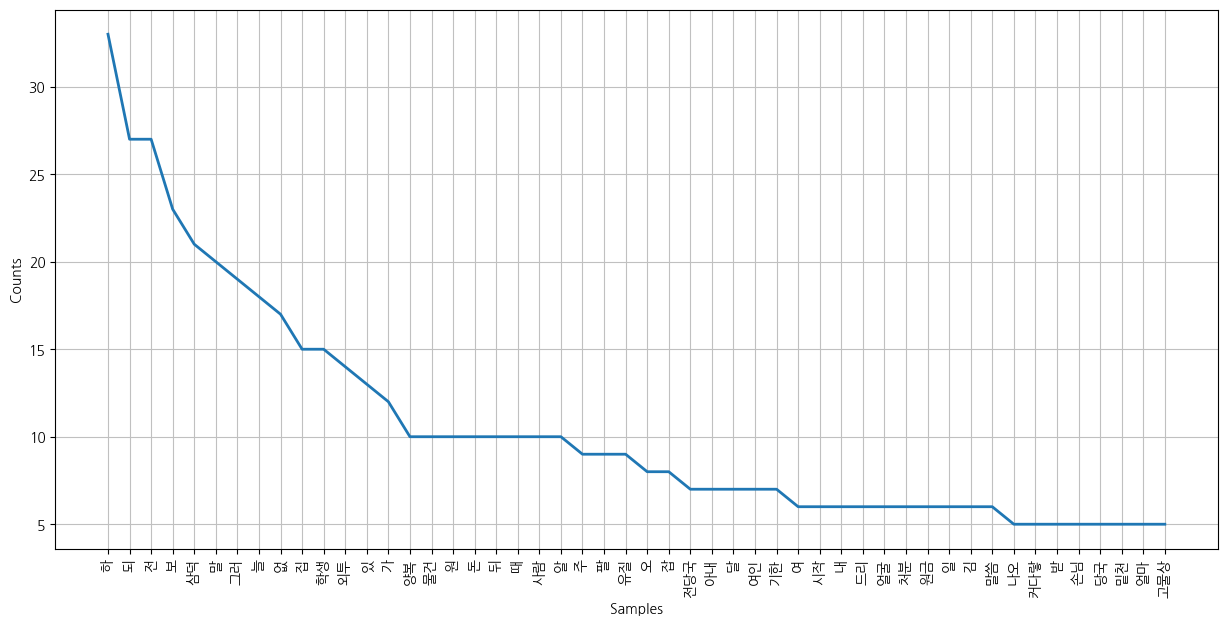

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
# 그래프에 한글 폰트 설정
font_name = matplotlib.font_manager.FontProperties(fname="/Users/oseulgi/Downloads/Nanum_Gothic/NanumGothic-Bold.ttf").get_name() # NanumGothic.otf

word_counted = nltk.Text(word_cleaned4)
plt.figure(figsize=(15,7))
word_counted.plot(50)

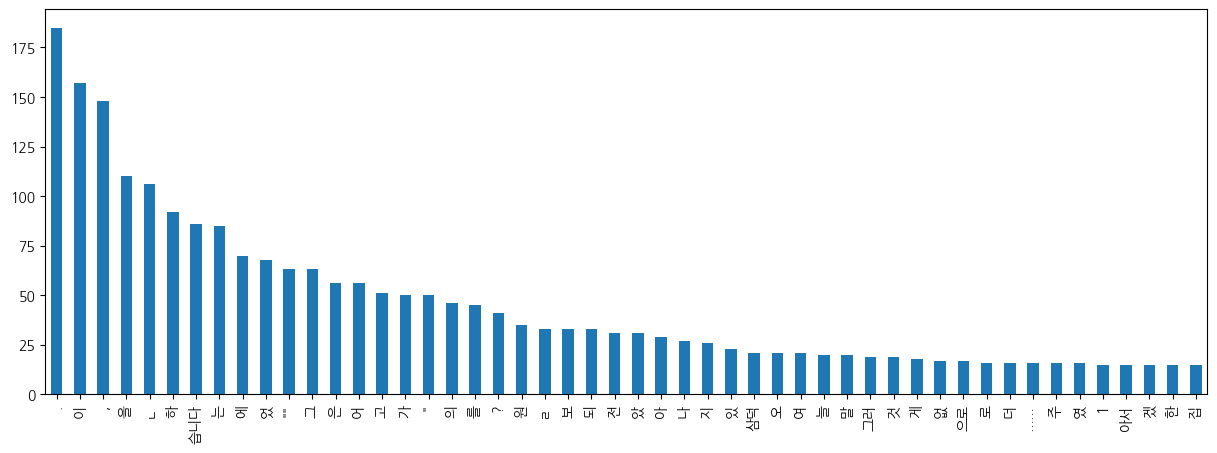

In [45]:
word_frequency = nltk.FreqDist(word_cleaned)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

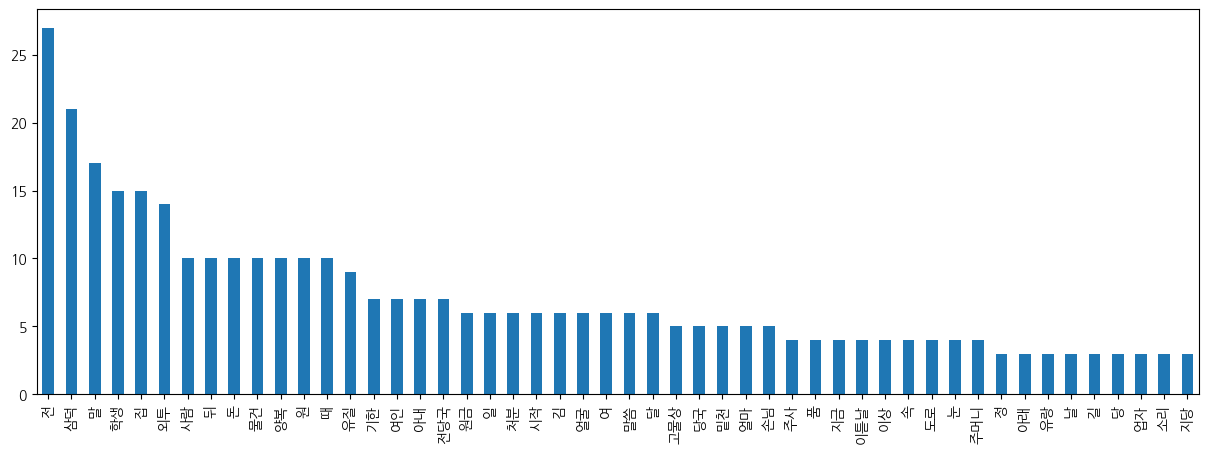

In [29]:
word_frequency = nltk.FreqDist(word_cleaned2)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

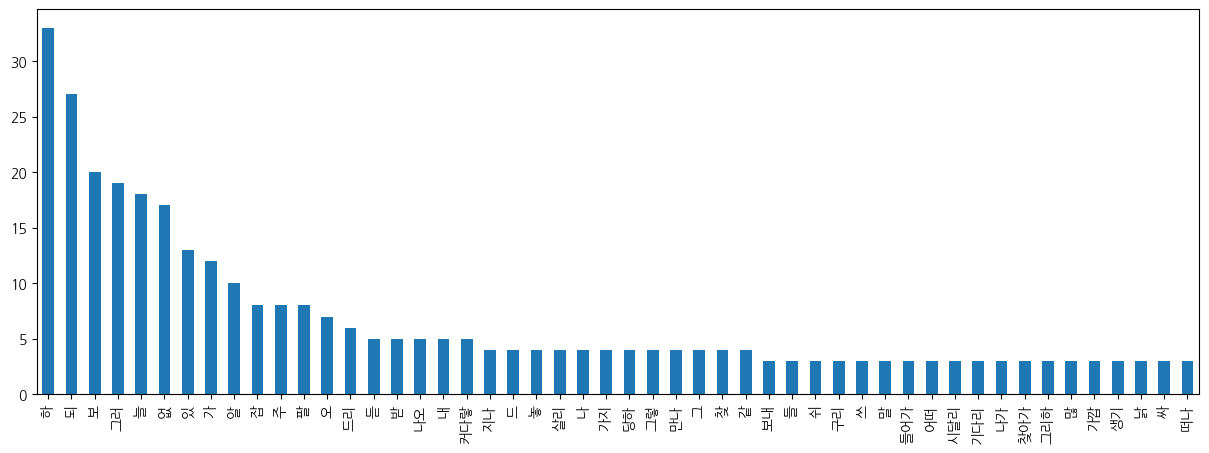

In [46]:
word_frequency = nltk.FreqDist(word_cleaned3)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

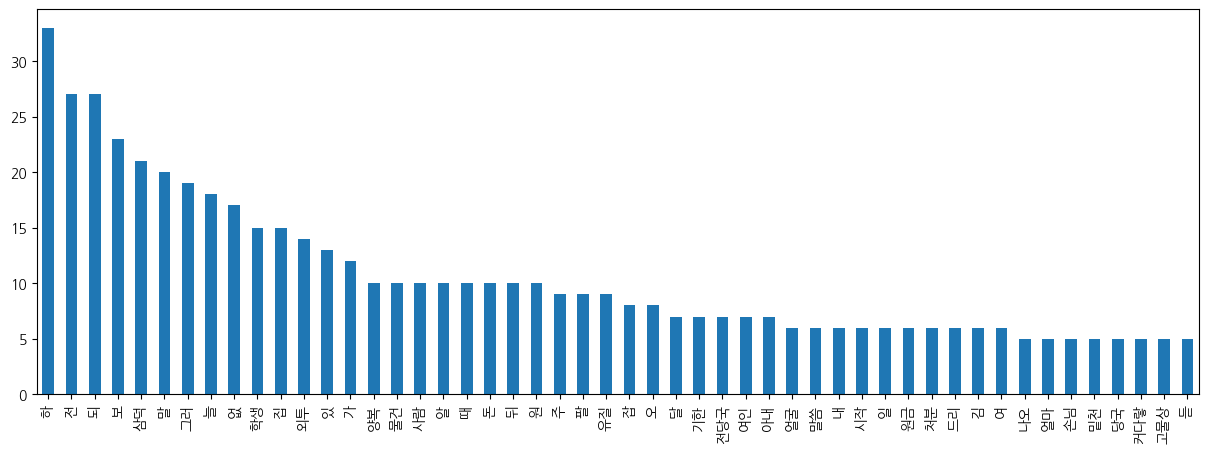

In [47]:
word_frequency = nltk.FreqDist(word_cleaned4)
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

result = df.sort_values([0], ascending = False)
result = result[:50]
result.plot(kind='bar', legend=False, figsize=(15,5))
plt.show()

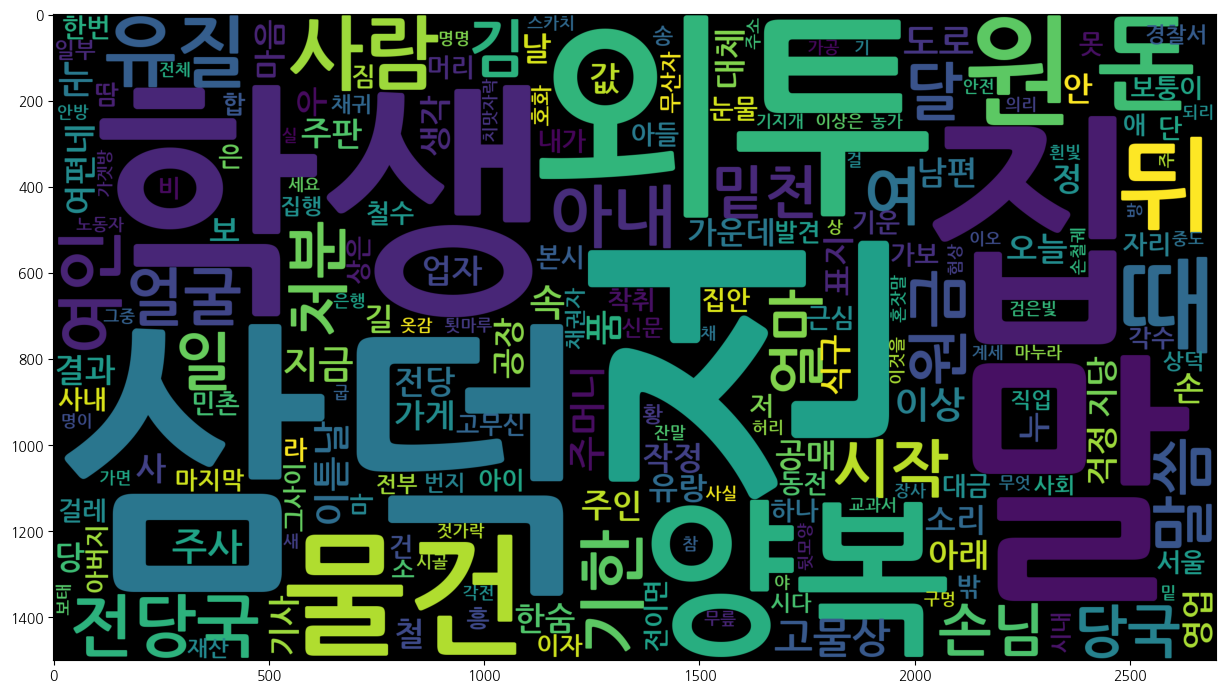

In [48]:
c = Counter(word_cleaned2)

wc = WordCloud(font_path='/Users/oseulgi/Downloads/Nanum_Gothic/NanumGothic-Bold.ttf', width=900, height=500, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(15, 15))
plt.imshow(gen)

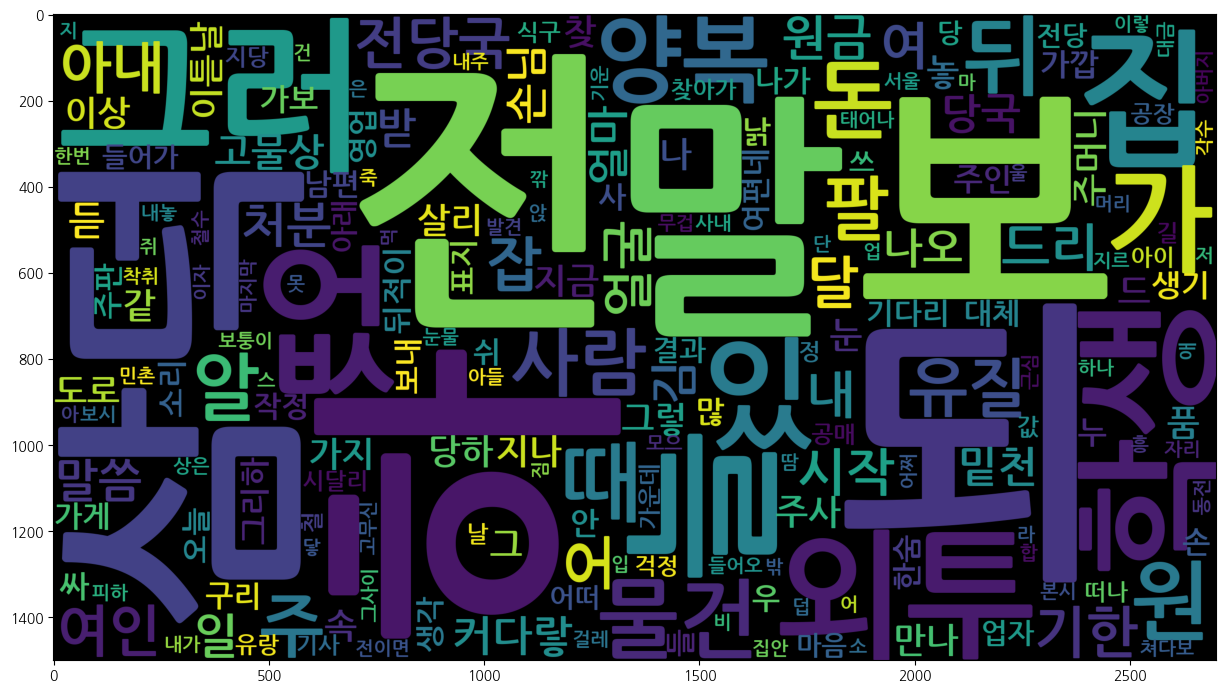

In [49]:
d = Counter(word_cleaned4)

wc = WordCloud(font_path='/Users/oseulgi/Downloads/Nanum_Gothic/NanumGothic-Bold.ttf', width=900, height=500, scale=3.0, max_font_size=250)
gen = wc.generate_from_frequencies(d)
plt.figure(figsize=(15, 15))
plt.imshow(gen)

In [ ]:
#2. 일반적인 영문텍스트를 가지고 아래와 같이 관계데이터 그리기

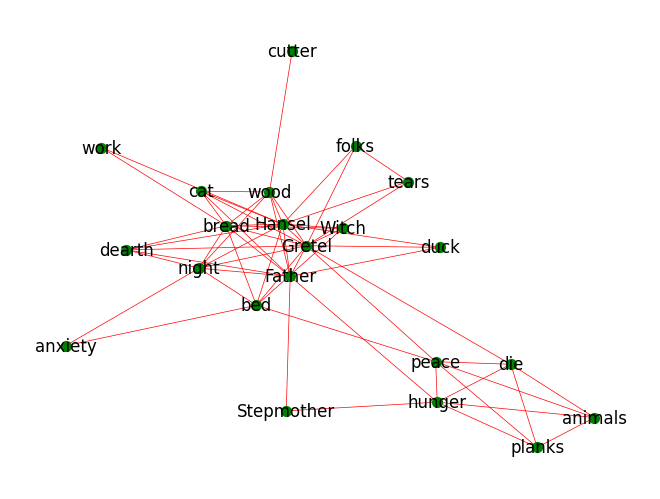

In [32]:
#제가 선택한건 헨젤과 그레텔입니다.
import json
import codecs
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk import sent_tokenize

def cooccurrence(text, cast):
    cooccurring = dict.fromkeys(itertools.combinations(cast, 2), 0)
    chapters = list(text['chapters'].values())  # 'chapters'를 리스트로 변환
    for chapter in chapters:
        for sent in nltk.sent_tokenize(chapter):
            for pair in cooccurring.keys():
                if pair[0].lower() in sent.lower() and pair[1].lower() in sent.lower():
                    cooccurring[pair] += 1
    return cooccurring

if __name__ == '__main__':
    with codecs.open('/Users/oseulgi/Desktop/hansel2.json', 'r', 'utf-8-sig') as data:
        text = json.load(data)
        cast = text['cast']

        G = nx.Graph()
        G.name = "Hansel and Gretel"

        for character in cast:
            G.add_node(character)

        pairs = cooccurrence(text, cast)
        for pair, wgt in pairs.items():
            if wgt > 0:
                G.add_edge(pair[0], pair[1], weight=wgt)

        if "Hansel" in G:
            D = nx.ego_graph(G, "Hansel", radius=50)
            if len(D) > 0:
                edge_attributes = nx.get_edge_attributes(D, "weight")
                if edge_attributes:
                    edges, weights = zip(*edge_attributes.items())
                    pos = nx.spring_layout(D, k=.5, iterations=40)
                    nx.draw(D, pos, node_color="green", node_size=50, edgelist=edges,
                            width=.5, edge_color="red", with_labels=True, font_size=12)
                    plt.show()
                else:
                    print("The ego graph has no weighted edges.")
            else:
                print("The ego graph is empty.")
        else:
            print("'Hansel' is not in the graph.")
